In [ ]:
#assignment 5

In [ ]:
#assignment 6

In [ ]:
pip install ultralytics


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 922.6/922.6 kB 17.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 54.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 93.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 46.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 19.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 42.5 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [ ]:
pip install --upgrade sympy


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 38.7 MB/s eta 0:00:00
  Attempting uninstall: sympy
    Found existing installation: sympy 1.13.1
    Uninstalling sympy-1.13.1:
      Successfully uninstalled sympy-1.13.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.5.1+cu124 requires sympy==1.13.1; python_version >= "3.9", but you have sympy 1.13.3 which is incompatible.


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


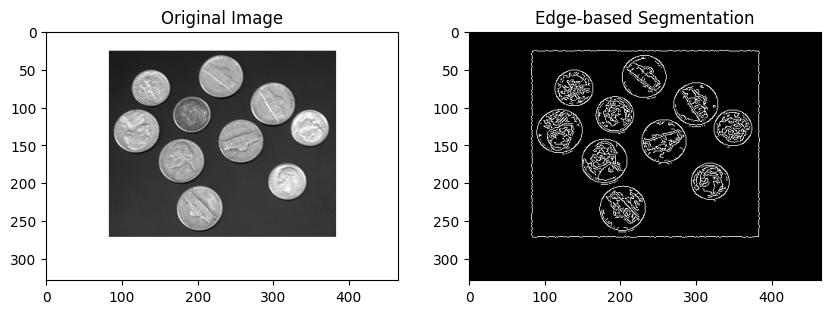

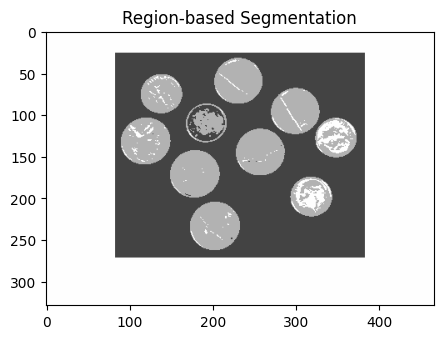

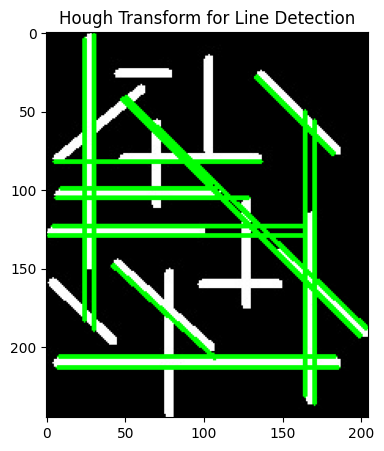

100%|██████████| 6.25M/6.25M [00:00<00:00, 69.8MB/s]

WARNING ⚠️ Environment does not support cv2.imshow() or PIL Image.show()




image 1/1 /content/DetectEdgesInImages.png: 480x640 6 bowls, 1 dining table, 308.1ms
Speed: 13.1ms preprocess, 308.1ms inference, 37.5ms postprocess per image at shape (1, 3, 480, 640)


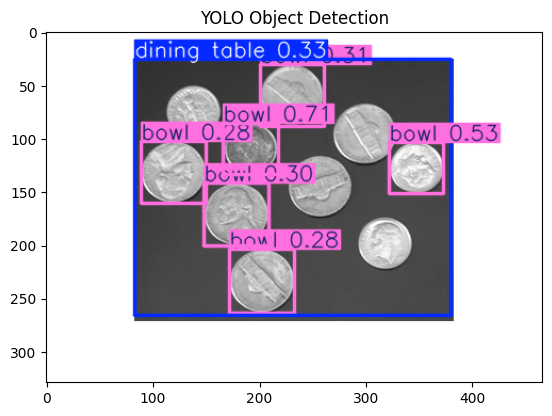

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth
100%|██████████| 160M/160M [00:01<00:00, 136MB/s]


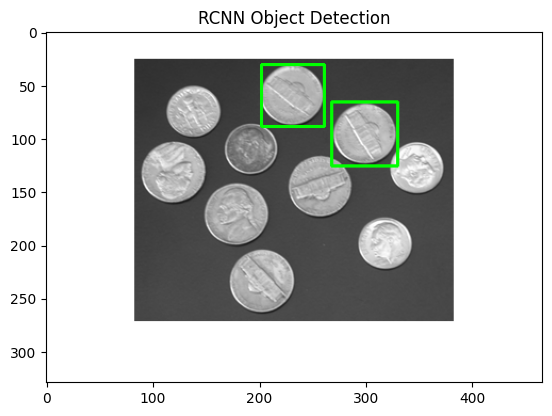

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from ultralytics import YOLO
import torch
import torchvision.transforms as transforms
from torchvision import models
from PIL import Image

def edge_based_segmentation(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    edges = cv2.Canny(image, 50, 150)

    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    plt.imshow(image, cmap='gray')
    plt.title('Original Image')
    plt.subplot(1,2,2)
    plt.imshow(edges, cmap='gray')
    plt.title('Edge-based Segmentation')
    plt.show()
    return edges

def region_based_segmentation(image_path, k=3):
    image = cv2.imread(image_path)
    pixel_values = image.reshape((-1, 3)).astype(np.float32)

    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
    _, labels, centers = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    centers = np.uint8(centers)
    segmented_image = centers[labels.flatten()].reshape(image.shape)

    plt.figure(figsize=(5,5))
    plt.imshow(cv2.cvtColor(segmented_image, cv2.COLOR_BGR2RGB))
    plt.title('Region-based Segmentation')
    plt.show()

def hough_transform(image_path):
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(gray, 50, 150)

    lines = cv2.HoughLinesP(edges, 1, np.pi/180, 68, minLineLength=15, maxLineGap=250)
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line[0]
            cv2.line(image, (x1, y1), (x2, y2), (0, 255, 0), 2)

    plt.figure(figsize=(10,5))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title('Hough Transform for Line Detection')
    plt.show()

def yolo_object_detection(image_path):
    model = YOLO('yolov8n.pt')  # Load YOLOv8 model
    results = model(image_path, show=True)
    plt.imshow(cv2.cvtColor(results[0].plot(), cv2.COLOR_BGR2RGB))
    plt.title('YOLO Object Detection')
    plt.show()

def rcnn_object_detection(image_path):
    model = models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
    model.eval()

    image = Image.open(image_path).convert("RGB")
    transform = transforms.Compose([transforms.ToTensor()])
    image_tensor = transform(image).unsqueeze(0)

    with torch.no_grad():
        outputs = model(image_tensor)

    boxes = outputs[0]['boxes'].numpy()
    scores = outputs[0]['scores'].numpy()
    image_cv = cv2.imread(image_path)

    for i in range(len(boxes)):
        if scores[i] > 0.5:
            x1, y1, x2, y2 = map(int, boxes[i])
            cv2.rectangle(image_cv, (x1, y1), (x2, y2), (0, 255, 0), 2)

    plt.imshow(cv2.cvtColor(image_cv, cv2.COLOR_BGR2RGB))
    plt.title('RCNN Object Detection')
    plt.show()

# Example usage
image_path = '/content/DetectEdgesInImages.png'  # Provide an image with lines and circles
edge_based_segmentation(image_path)
region_based_segmentation(image_path)
hough_transform("/content/line .jpg")
yolo_object_detection(image_path)
rcnn_object_detection(image_path)
